## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Car price dataset like last week. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll work with the `MSRP` variable, and we'll transform it to a classification task. 

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`
* `MSRP`


### Data preparation

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `engine_hp`
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
!wget $data 

--2023-10-09 21:45:38--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Auflösen des Hostnamens raw.githubusercontent.com (raw.githubusercontent.com) … 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Verbindungsaufbau zu raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 1475504 (1,4M) [text/plain]
Wird in ‘data.csv’ gespeichert.

data.csv            100%[===================>]   1,41M  1,31MB/s    in 1,1s    

2023-10-09 21:45:40 (1,31 MB/s) - ‘data.csv’ gespeichert [1475504/1475504]



In [3]:
df = pd.read_csv(data)
df.columns 

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style','highway MPG', 'city mpg', 'MSRP']


In [5]:
df = df[columns]


In [6]:
df.head()


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [8]:
df.columns = df.columns.str.replace(" ","_").str.lower()


In [9]:
df.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [10]:
cat_cols = ["make", "model", "transmission_type", "vehicle_style"]
num_cols = ["year", "engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]

for c in cat_cols:
    df[c]=df[c].str.replace(" ","_").str.lower()

In [11]:
df=df.fillna(0)


In [12]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [13]:
df["above_average"] = (df.msrp > df.msrp.mean()).astype(int)
df.year = 2023 - df.year

In [14]:
df.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,12,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,12,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,12,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,12,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,12,230.0,6.0,manual,convertible,28,18,34500,0


In [15]:
df = df.drop("msrp", axis=1)

In [16]:
df.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,12,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,12,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,12,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,12,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,12,230.0,6.0,manual,convertible,28,18,0


In [17]:
from sklearn.model_selection import train_test_split


In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)


In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

X_train = df_train.drop("above_average", axis=1)
X_val = df_val.drop("above_average", axis=1)
X_test = df_test.drop("above_average", axis=1)

In [22]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, precision_score, f1_score
X_train_engine_hp = df_train.engine_hp.sort_values()
print("engine_hp", auc(X_train_engine_hp, y_train[X_train_engine_hp.index]))

X_train_engine_cylinders = df_train.engine_cylinders.sort_values()
print("engine_cylinders", auc(X_train_engine_cylinders, y_train[X_train_engine_cylinders.index]))

X_train_highway_mpg = df_train.highway_mpg.sort_values()
print("highway_mpg", auc(X_train_highway_mpg, y_train[X_train_highway_mpg.index]))

X_train_city_mpg = df_train.city_mpg.sort_values()
print("city_mpg", auc(X_train_city_mpg, y_train[X_train_city_mpg.index]))

engine_hp 684.0
engine_cylinders 10.0
highway_mpg 286.5
city_mpg 49.5


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979


In [23]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
train_dic = X_train.to_dict(orient="records")
X_train_norm = dv.fit_transform(train_dic)
val_dic = X_val.to_dict(orient="records")
X_val_norm = dv.transform(val_dic)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)
log_model.fit(X_train_norm, y_train)
y_preds = log_model.predict(X_val_norm)
fpr, tpr, thresholds = roc_curve(y_val, y_preds)
print("auc:", round(auc(fpr, tpr),3))
print("precision:", round(precision_score(y_val, y_preds),3))
print("recall:", round(recall_score(y_val, y_preds),3))

auc: 0.926
precision: 0.906
recall: 0.887


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

In [24]:
auc_arr = []
recall = []
precision = []
f1 = []
C_values = np.arange(0.1,1.01,0.01)

for c in C_values:
    log_model = LogisticRegression(solver="liblinear", C=c, max_iter=1000)
    log_model.fit(X_train_norm, y_train)
    y_preds = log_model.predict(X_val_norm)
    
    fpr, tpr, thresholds = roc_curve(y_val, y_preds)
    precision_value = round(precision_score(y_val, y_preds),3)
    recall_value = round(recall_score(y_val, y_preds),3)
    f1_value = round(f1_score(y_val, y_preds),3)
    auc_value = round(auc(fpr, tpr),3)

    precision.append(precision_value)
    recall.append(recall_value)
    f1.append(f1_value)
    auc_arr.append(auc_value)

In [25]:
dic_scores = {"C":C_values, "recall":recall, "precision":precision, "f1": f1, "auc":auc_arr}
df_scores = pd.DataFrame(dic_scores)
df_scores

,C,recall,precision,f1,auc
0,0.10,0.820,0.904,0.860,0.893
1,0.11,0.829,0.903,0.864,0.898
2,0.12,0.830,0.900,0.864,0.898
3,0.13,0.832,0.899,0.864,0.898
4,0.14,0.833,0.902,0.866,0.900
...,...,...,...,...,...
86,0.96,0.888,0.905,0.897,0.927
87,0.97,0.888,0.905,0.897,0.927
88,0.98,0.887,0.905,0.896,0.926
89,0.99,0.888,0.905,0.897,0.927


Text(0.5, 0, 'C')

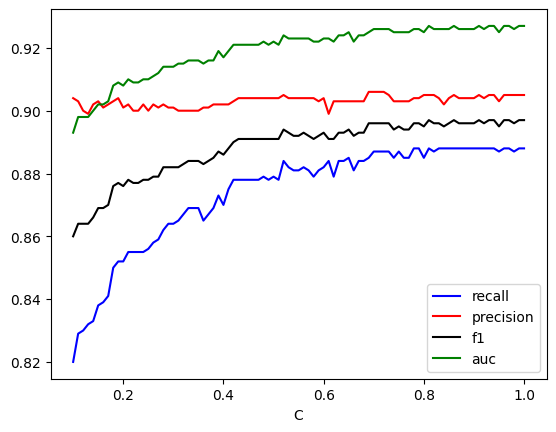

In [26]:
plt.plot(C_values, recall, color="blue", label="recall")
plt.plot(C_values, precision, color="Red", label="precision")
plt.plot(C_values, f1, color="black", label="f1")
plt.plot(C_values, auc_arr, color="green", label="auc")
plt.legend()
plt.xlabel("C")

In [27]:
df_scores.sort_values("f1", ascending=False)

,C,recall,precision,f1,auc
90,1.00,0.888,0.905,0.897,0.927
84,0.94,0.888,0.905,0.897,0.927
76,0.86,0.888,0.905,0.897,0.927
71,0.81,0.888,0.905,0.897,0.927
81,0.91,0.888,0.905,0.897,0.927
...,...,...,...,...,...
4,0.14,0.833,0.902,0.866,0.900
2,0.12,0.830,0.900,0.864,0.898
1,0.11,0.829,0.903,0.864,0.898
3,0.13,0.832,0.899,0.864,0.898


### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

In [28]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

C=1

def train(X_train, y_train, C=1):
    dicts = X_train[cat_cols + num_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train_norm = dv.fit_transform(dicts)

    model = LogisticRegression(solver="liblinear", C=C, max_iter=1000)
    model.fit(X_train_norm, y_train)
    
    return dv, model


def predict(X, dv, model):
    dicts = X.to_dict(orient='records')

    X_norm = dv.transform(dicts)
    y_pred = model.predict(X_norm)

    return y_pred


n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    X_train = df_train.drop("above_average",axis=1)
    X_val = df_val.drop("above_average",axis=1)

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(X_train, y_train, C=1)
    y_pred = predict(X_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C', C)
print("Mean Scores", np.mean(scores))
print("Mean STD",np.std(scores))

C 1
Mean Scores 0.9294969872632303
Mean STD 0.00580833601113063


### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [29]:
n_splits = 5

scores_arr = []
std_arr = []
C_arr = []

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        X_train = df_train.drop("above_average",axis=1)
        X_val = df_val.drop("above_average",axis=1)

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(X_train, y_train, C=C)
        y_pred = predict(X_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
    C_arr.append(C)
    scores_arr.append(np.mean(scores))
    std_arr.append(np.std(scores))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.794 +- 0.007
C=0.01 0.845 +- 0.004
C=0.1 0.899 +- 0.008
C=0.5 0.926 +- 0.005
C=1 0.929 +- 0.006
C=5 0.933 +- 0.007
C=10 0.934 +- 0.006
